In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

dt = 1.0000
dt = 0.5000
dt = 0.2000
dt = 0.1000
dt = 0.0667
dt = 0.0500


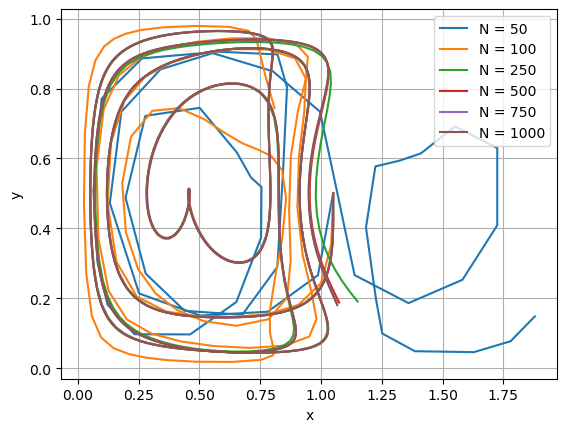

In [16]:
# Heuns method
def heun(x0, y0, t0, tf, f, Nmax=100):
    xs = [x0]
    ys = [y0]
    ts = [t0]
    dt = (tf - t0) / Nmax
    print("dt = {:.4f}".format(dt))
    
    while ts[-1] < tf:
        x,y, t = xs[-1],ys[-1],ts[-1]
        k0_x, k0_y = f(x, y, t)
        k1_x, k1_y  = f(x + dt * k0_x, y + dt*k0_y, t + dt)
        
        xs.append(x + 0.5 * dt * (k0_x + k1_x))
        ys.append(y + 0.5 * dt * (k0_y + k1_y))
        ts.append(t + dt)
    return np.array(xs), np.array(ys), np.array(ts)


def func(x, t):
    eps, w = 0.25, 1
    a = eps * np.sin(w * t)
    b = 1 - 2 * eps * np.sin(w * t)
    dy = 2 * a * x + b
    y = a * x**2 + b * x
    return y, dy

def velocity(x, y, t):
    A = 0.1
    f, df = func(x, t)
    vx = -np.pi * A * np.sin(np.pi * f) * np.cos(np.pi * y)
    vy = np.pi * A * np.cos(np.pi * f) * np.sin(np.pi * y) * df
    return vx, vy

ti, tf = 0, 50
x0, y0 = np.array([1.05, 0.50])

for N in [50, 100, 250, 500, 750, 1000]:
    xs, ys, ts = heun(x0, y0, ti, tf, velocity, N)
    plt.plot(xs, ys, label="N = {}".format(N))
    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

